[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


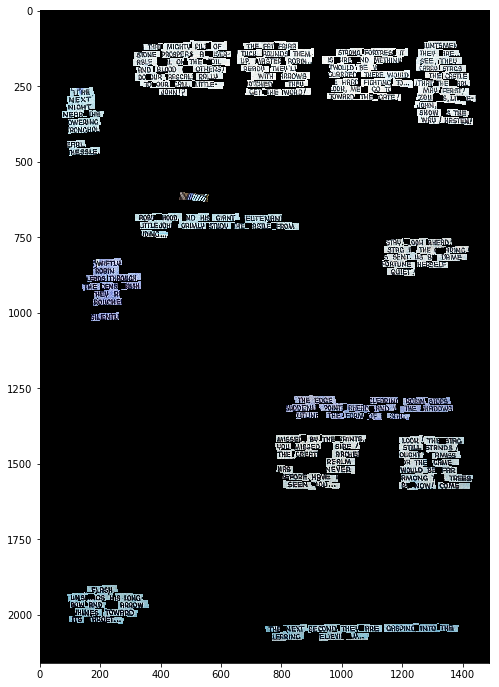

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def get_mask(textfilepath, imgsize):
	with open(textfilepath, 'r') as f:
		polys = f.read()[:-1].split('\n')
		polys = [poly.split(', ') for poly in polys]
		polys = [np.array(poly, dtype=np.int32).reshape((-1, 1, 2)) for poly in polys]

	mask = np.zeros(imgsize, dtype=np.uint8)

	if len(polys) == 0:
		return mask

	cv2.fillPoly(mask, polys, color=255)
	mask = mask.astype(bool)
	# cv2.polylines(mask, polys, True, color=255, thickness=1)

	return mask

if __name__ == '__main__':
	img = cv2.imread('MCCALL_ROBINHOOD_T31_005.jpg')
	m = get_mask('MCCALL_ROBINHOOD_T31_005.txt', img.shape[:2])
	print(m)
	m = np.repeat(m[:, :, np.newaxis], 3, axis=2)
	temp = np.zeros(img.shape, dtype=np.uint8)
	temp[np.where(m == 1)] = img[np.where(m == 1)]
	plt.figure(figsize = (16,12))
	plt.imshow(temp)